In [100]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [101]:
# Read csv dataset
df = pd.read_csv('heart.csv')
df.dropna(inplace = True) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [102]:
# Replace all text data with numbers ONE_HOT
def replace_column_with_one_hot(column, df):
    one_hot = pd.get_dummies(df[column])
    df = df.drop(column, axis=1)
    df = df.join(one_hot)
    return df

columns_to_replace = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for colname in columns_to_replace:
    df = replace_column_with_one_hot(colname, df)

df.shape

(918, 21)

In [103]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

label = 'HeartDisease'

y_train = train.pop(label)
y_test = test.pop(label)

x_train = train
x_test = test

x_train.shape, y_train.shape

((734, 20), (734,))

In [104]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
627,44,140,235,0,180,0.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
378,70,140,0,1,157,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
765,41,112,250,0,179,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
528,49,131,142,0,127,1.5,0,1,0,0,1,0,0,1,0,0,1,0,1,0
117,59,130,338,1,130,1.5,1,0,1,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,45,110,0,0,138,-0.1,0,1,0,0,1,0,0,1,0,1,0,0,0,1
521,61,120,282,0,135,4.0,0,1,1,0,0,0,0,0,1,0,1,1,0,0
72,52,120,182,0,150,0.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
303,62,120,0,1,123,1.7,1,0,1,0,0,0,0,0,1,0,1,1,0,0


In [105]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(x_train)
norm(x_train.iloc[:3])

2021-12-26 14:28:57.215756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-26 14:28:57.228837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[-1.0252545 ,  0.40587112,  0.3169598 , -0.56371427,  1.7294507 ,
        -0.8403324 , -0.50680304,  0.506803  , -1.0943513 , -0.4768908 ,
         1.8940701 , -0.2336615 ,  1.9567697 , -1.247995  , -0.4747375 ,
         0.8361065 , -0.8361064 , -0.2674562 , -1.0248314 ,  1.1727765 ],
       [ 1.7429881 ,  0.40587112, -1.8242012 ,  1.7739484 ,  0.806414  ,
         1.0737216 , -0.50680304,  0.506803  ,  0.91378355, -0.4768908 ,
        -0.5279637 , -0.2336615 , -0.5110464 ,  0.80128545, -0.4747375 ,
        -1.1960196 ,  1.1960196 , -0.2674562 ,  0.97577035, -0.85267746],
       [-1.3446671 , -1.0789044 ,  0.45362964, -0.56371427,  1.6893187 ,
        -0.8403324 , -0.50680304,  0.506803  , -1.0943513 , -0.4768908 ,
         1.8940701 , -0.2336615 , -0.5110464 ,  0.80128545, -0.4747375 ,
         0.8361065 , -0.8361064 , -0.2674562 , -1.0248314 ,  1.1727765 ]],
      dtype=float32)>

In [106]:
model = tf.keras.Sequential([
  norm,
  tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(train.shape[1],)),
  tf.keras.layers.Dense(8, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [107]:
learning_rate = 0.001
epochs = 1800

opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric = tf.keras.metrics.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=opt, loss=loss, metrics=[metric, 'accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 20)               41        
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 16)                336       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 522
Trainable params: 481
Non-trainable params: 41
_________________________________________________________________


In [108]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/1800
10/19 [==============>...............] - ETA: 0s - loss: 0.7105 - binary_crossentropy: 0.7105 - accuracy: 0.4844

2021-12-26 14:28:57.493384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 15ms/step - loss: 0.7135 - binary_crossentropy: 0.7135 - accuracy: 0.4753 - val_loss: 0.7012 - val_binary_crossentropy: 0.7012 - val_accuracy: 0.4150
Epoch 2/1800
12/19 [=================>............] - ETA: 0s - loss: 0.7210 - binary_crossentropy: 0.7210 - accuracy: 0.4688

2021-12-26 14:28:57.782260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 6ms/step - loss: 0.7134 - binary_crossentropy: 0.7134 - accuracy: 0.4753 - val_loss: 0.7011 - val_binary_crossentropy: 0.7011 - val_accuracy: 0.4150
Epoch 3/1800
19/19 [==============================] - 0s 7ms/step - loss: 0.7132 - binary_crossentropy: 0.7132 - accuracy: 0.4753 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_accuracy: 0.4150
Epoch 4/1800
19/19 [==============================] - 0s 7ms/step - loss: 0.7131 - binary_crossentropy: 0.7131 - accuracy: 0.4804 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_accuracy: 0.4150
Epoch 5/1800
19/19 [==============================] - 0s 8ms/step - loss: 0.7129 - binary_crossentropy: 0.7129 - accuracy: 0.4804 - val_loss: 0.7007 - val_binary_crossentropy: 0.7007 - val_accuracy: 0.4150
Epoch 6/1800
19/19 [==============================] - 0s 6ms/step - loss: 0.7128 - binary_crossentropy: 0.7128 - accuracy: 0.4804 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_

dict_keys(['loss', 'binary_crossentropy', 'accuracy', 'val_loss', 'val_binary_crossentropy', 'val_accuracy'])


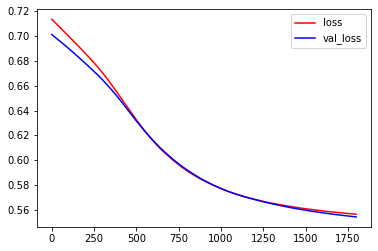

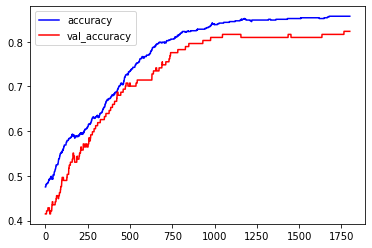

In [109]:
print(history.history.keys())

plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='b')
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'], c='b')
plt.plot(history.history['val_accuracy'], c='r')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [110]:
model.evaluate(x_test, y_test, verbose=2)

6/6 - 0s - loss: 0.5625 - binary_crossentropy: 0.5625 - accuracy: 0.8424 - 39ms/epoch - 6ms/step


[0.5625153183937073, 0.5625153183937073, 0.842391312122345]

In [111]:
pred = model.predict(x_test)
list(map(lambda x: [1, x[1]] if x[0] > 0.5 else [0, x[1]], zip(pred, y_test)))

2021-12-26 14:32:57.306334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[[1, 0],
 [0, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 0],
 [1, 1],
 [0, 1],
 [1, 1],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 1],
 [1, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 1],
 [0, 0],
 [0, 1],
 [0, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 0],
 [1, 1],
 [0, 1],
 [0, 0],
 [1, 1],
 [0, 1],
 [0, 1],
 